In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import os
import glob
import json
import dask.dataframe as dd

import ruptures as rpt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Senzmate/RCA/jsonoutput3_one_device.csv",  on_bad_lines='skip')

In [ ]:
df.head()

,_id,_class,deviceId,number,code,time,value,creationDate,modifiedDate
0,61cf998d2d3b872d3baa528e,com.magma.core.data.entity.Sensor,869170034808734,0,T,2022-01-01T00:00:13.521Z,21.14,2022-01-01T00:00:13.522Z,2022-01-01T00:00:13.522Z
1,61cf998d2d3b872d3baa528f,com.magma.core.data.entity.Sensor,869170034808734,1,H,2022-01-01T00:00:13.521Z,103.10,2022-01-01T00:00:13.523Z,2022-01-01T00:00:13.523Z
2,61cf998d2d3b872d3baa5290,com.magma.core.data.entity.Sensor,869170034808734,2,MEA4,2022-01-01T00:00:13.521Z,545.00/163.00,2022-01-01T00:00:13.524Z,2022-01-01T00:00:13.524Z
3,61cf998d2d3b872d3baa5291,com.magma.core.data.entity.Sensor,869170034808734,3,B,2022-01-01T00:00:13.521Z,266,2022-01-01T00:00:13.524Z,2022-01-01T00:00:13.524Z
4,61cf9bc72d3b872d3baa54fa,com.magma.core.data.entity.Sensor,869170034808734,0,T,2022-01-01T00:09:43.709Z,21.08,2022-01-01T00:09:43.709Z,2022-01-01T00:09:43.709Z


In [ ]:
df2 = df.drop(columns=['_id', '_class', 'number', 'creationDate', 'modifiedDate'])
df2.head()

,deviceId,code,time,value
0,869170034808734,T,2022-01-01T00:00:13.521Z,21.14
1,869170034808734,H,2022-01-01T00:00:13.521Z,103.10
2,869170034808734,MEA4,2022-01-01T00:00:13.521Z,545.00/163.00
3,869170034808734,B,2022-01-01T00:00:13.521Z,266
4,869170034808734,T,2022-01-01T00:09:43.709Z,21.08


In [ ]:
needed_values = ["B", "IT", "LIA1", "H", "IRO", "T", "ST", "SS"]
df3 = df2.loc[df2['code'].isin(needed_values)].reset_index(drop=True)
df3.head()

,deviceId,code,time,value
0,869170034808734,T,2022-01-01T00:00:13.521Z,21.14
1,869170034808734,H,2022-01-01T00:00:13.521Z,103.10
2,869170034808734,B,2022-01-01T00:00:13.521Z,266
3,869170034808734,T,2022-01-01T00:09:43.709Z,21.08
4,869170034808734,H,2022-01-01T00:09:43.709Z,103.07


In [ ]:
VALUES_RANGE = {'B': {"min": 260, "max": 314},
                'IT': {"min": -55, "max": 125},
                'LIA1': {"min": 0, "max": 65535},
                'H': {"min": 0, "max": 110},
                'IRO': {"min": 0, "max": 200},
                'T': {"min": -40, "max": 125},
                'ST': {"min": -55, "max": 125},
                'SS': {"min": 2, "max": 30},
                }
def detect_outlier(row):
  try:
    if VALUES_RANGE[row.code]['min'] <= float(row.value) <= VALUES_RANGE[row.code]['max']:
      return 0
  except:
    pass
  return 1

In [ ]:
df3['outlier_data_flag'] = df3.apply(lambda row: detect_outlier(row), axis=1)
df3.head()

,deviceId,code,time,value,outlier_data_flag
0,869170034808734,T,2022-01-01T00:00:13.521Z,21.14,0
1,869170034808734,H,2022-01-01T00:00:13.521Z,103.10,0
2,869170034808734,B,2022-01-01T00:00:13.521Z,266,0
3,869170034808734,T,2022-01-01T00:09:43.709Z,21.08,0
4,869170034808734,H,2022-01-01T00:09:43.709Z,103.07,0


In [ ]:
df3.tail(5)

,deviceId,code,time,value,outlier_data_flag
36516,869170034808734,T,2022-06-30T23:42:51.790Z,25.6,0
36517,869170034808734,H,2022-06-30T23:42:51.790Z,8���'���EҪ��r�z���r��,1
36518,869170034808734,T,2022-06-30T23:52:38.529Z,25.71,0
36519,869170034808734,H,2022-06-30T23:52:38.529Z,89.34,0
36520,869170034808734,B,2022-06-30T23:52:38.529Z,298,0


In [ ]:
df3['high_volume'] = 1
df3.groupby(['deviceId','code', 'time']).high_volume.count().reset_index()

,deviceId,code,time,high_volume
0,869170034808734,B,2022-01-01T00:00:13.521Z,1
1,869170034808734,B,2022-01-01T00:09:43.709Z,1
2,869170034808734,B,2022-01-01T00:19:13.667Z,1
3,869170034808734,B,2022-01-01T00:28:42.770Z,1
4,869170034808734,B,2022-01-01T00:47:42.334Z,1
...,...,...,...,...
36485,869170034808734,T,2022-06-30T23:12:58.108Z,1
36486,869170034808734,T,2022-06-30T23:22:58.108Z,1
36487,869170034808734,T,2022-06-30T23:32:51.790Z,1
36488,869170034808734,T,2022-06-30T23:42:51.790Z,1


In [ ]:
df3.head(5)

,deviceId,code,time,value,outlier_data_flag,high_volume
0,869170034808734,T,2022-01-01T00:00:13.521Z,21.14,0,1
1,869170034808734,H,2022-01-01T00:00:13.521Z,103.10,0,1
2,869170034808734,B,2022-01-01T00:00:13.521Z,266,0,1
3,869170034808734,T,2022-01-01T00:09:43.709Z,21.08,0,1
4,869170034808734,H,2022-01-01T00:09:43.709Z,103.07,0,1


In [ ]:
df3['high_volume_flag'] = df3.apply(lambda row: 1 if row.high_volume > 1 else 0, axis=1)
df3.head(5)

,deviceId,code,time,value,outlier_data_flag,high_volume,high_volume_flag
0,869170034808734,T,2022-01-01T00:00:13.521Z,21.14,0,1,0
1,869170034808734,H,2022-01-01T00:00:13.521Z,103.10,0,1,0
2,869170034808734,B,2022-01-01T00:00:13.521Z,266,0,1,0
3,869170034808734,T,2022-01-01T00:09:43.709Z,21.08,0,1,0
4,869170034808734,H,2022-01-01T00:09:43.709Z,103.07,0,1,0


In [ ]:
df3.tail(5)

,deviceId,code,time,value,outlier_data_flag,high_volume,high_volume_flag
36516,869170034808734,T,2022-06-30T23:42:51.790Z,25.6,0,1,0
36517,869170034808734,H,2022-06-30T23:42:51.790Z,8���'���EҪ��r�z���r��,1,1,0
36518,869170034808734,T,2022-06-30T23:52:38.529Z,25.71,0,1,0
36519,869170034808734,H,2022-06-30T23:52:38.529Z,89.34,0,1,0
36520,869170034808734,B,2022-06-30T23:52:38.529Z,298,0,1,0


In [ ]:
df3['miss_data_flag'] = 0
df3.head(0)

,deviceId,code,time,value,outlier_data_flag,high_volume,high_volume_flag,miss_data_flag


In [ ]:
def my_function(group_df, deviceId):
  # group_name = grouped.keys()
  group_key = group_df.name
  captured_values = group_df['code'].values
  res = [*set(captured_values)]
  for sensor in needed_values:
    if sensor not in res:
      new_row = {'deviceId':[deviceId], 'code':[sensor], 'time': [group_key], 'value':[0], 'outlier_data_flag':[0], 'high_volume':[0], 'high_volume_flag':[0], 'miss_data_flag': [1]}
      new_df = pd.DataFrame.from_dict(new_row)

      group_df.append(new_df, ignore_index=True)
  # l1.append(group_df)
  return group_df

In [ ]:
grouped = df3.groupby('time')

In [ ]:
deviceId = df3.loc[0, 'deviceId']
deviceId

869170034808734

In [ ]:
new_grouped = grouped.apply(my_function, deviceId=deviceId)

In [ ]:
new_grouped.head()

,deviceId,code,time,value,outlier_data_flag,high_volume,high_volume_flag,miss_data_flag
0,869170034808734,T,2022-01-01T00:00:13.521Z,21.14,0,1,0,0
1,869170034808734,H,2022-01-01T00:00:13.521Z,103.10,0,1,0,0
2,869170034808734,B,2022-01-01T00:00:13.521Z,266,0,1,0,0
3,869170034808734,T,2022-01-01T00:09:43.709Z,21.08,0,1,0,0
4,869170034808734,H,2022-01-01T00:09:43.709Z,103.07,0,1,0,0


In [ ]:
new_grouped.to_csv('/content/drive/MyDrive/Senzmate/RCA/result_1.csv', index=False)

In [ ]:
# new_grouped = pd.read_csv('/content/drive/MyDrive/Senzmate/RCA/result_1.csv',  on_bad_lines='skip')

In [ ]:
mask = new_grouped['miss_data_flag'] == 0
selected_rows = new_grouped[mask]
selected_rows.head()

,deviceId,code,time,value,outlier_data_flag,high_volume,high_volume_flag,miss_data_flag
0,869170034808734,T,2022-01-01T00:00:13.521Z,21.14,0,1,0,0
1,869170034808734,H,2022-01-01T00:00:13.521Z,103.10,0,1,0,0
2,869170034808734,B,2022-01-01T00:00:13.521Z,266,0,1,0,0
3,869170034808734,T,2022-01-01T00:09:43.709Z,21.08,0,1,0,0
4,869170034808734,H,2022-01-01T00:09:43.709Z,103.07,0,1,0,0


In [ ]:
temp_mask = (new_grouped['code'] == "T") & (new_grouped['outlier_data_flag'] == 0)
temp_rows = new_grouped[temp_mask]
temp_rows.head()

,deviceId,code,time,value,outlier_data_flag,high_volume,high_volume_flag,miss_data_flag
0,869170034808734,T,2022-01-01T00:00:13.521Z,21.14,0,1,0,0
3,869170034808734,T,2022-01-01T00:09:43.709Z,21.08,0,1,0,0
6,869170034808734,T,2022-01-01T00:19:13.667Z,21.05,0,1,0,0
9,869170034808734,T,2022-01-01T00:28:42.770Z,21.02,0,1,0,0
12,869170034808734,T,2022-01-01T00:47:42.334Z,21.01,0,1,0,0


In [ ]:
temp_rows['time_new'] = pd.to_datetime(temp_rows['time'])

<ipython-input-58-bb041a87d410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_rows['time_new'] = pd.to_datetime(temp_rows['time'])


In [ ]:
temp_rows['value'] = temp_rows['value'].astype(float)
temp_rows.head()

<ipython-input-59-90ea7cd31667>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_rows['value'] = temp_rows['value'].astype(float)


,deviceId,code,time,value,outlier_data_flag,high_volume,high_volume_flag,miss_data_flag,time_new
0,869170034808734,T,2022-01-01T00:00:13.521Z,21.14,0,1,0,0,2022-01-01 00:00:13.521000+00:00
3,869170034808734,T,2022-01-01T00:09:43.709Z,21.08,0,1,0,0,2022-01-01 00:09:43.709000+00:00
6,869170034808734,T,2022-01-01T00:19:13.667Z,21.05,0,1,0,0,2022-01-01 00:19:13.667000+00:00
9,869170034808734,T,2022-01-01T00:28:42.770Z,21.02,0,1,0,0,2022-01-01 00:28:42.770000+00:00
12,869170034808734,T,2022-01-01T00:47:42.334Z,21.01,0,1,0,0,2022-01-01 00:47:42.334000+00:00


In [ ]:
temp_rows.set_index(temp_rows['time_new'], inplace = True)
ts = temp_rows['value']

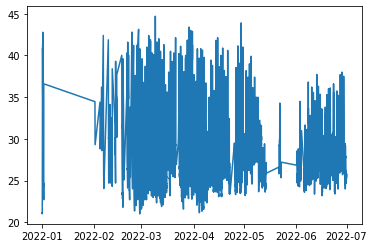

In [ ]:
plt.plot(temp_rows["time_new"], temp_rows["value"])

plt.show()

In [ ]:
ddf = dd.from_pandas(temp_rows, npartitions=37)

In [ ]:
print(ddf.divisions)

(Timestamp('2022-01-01 00:00:13.521000+0000', tz='UTC'), Timestamp('2022-02-17 09:49:46.048000+0000', tz='UTC'), Timestamp('2022-02-24 09:43:11.298000+0000', tz='UTC'), Timestamp('2022-02-28 18:01:43.487000+0000', tz='UTC'), Timestamp('2022-03-03 12:22:18.918000+0000', tz='UTC'), Timestamp('2022-03-06 11:27:50.881000+0000', tz='UTC'), Timestamp('2022-03-09 11:43:07.703000+0000', tz='UTC'), Timestamp('2022-03-12 11:59:16.054000+0000', tz='UTC'), Timestamp('2022-03-15 08:38:48.277000+0000', tz='UTC'), Timestamp('2022-03-18 04:38:57.091000+0000', tz='UTC'), Timestamp('2022-03-21 04:06:28.234000+0000', tz='UTC'), Timestamp('2022-03-25 06:54:00.542000+0000', tz='UTC'), Timestamp('2022-03-28 02:17:54.135000+0000', tz='UTC'), Timestamp('2022-03-30 22:11:30.354000+0000', tz='UTC'), Timestamp('2022-04-02 21:32:43.610000+0000', tz='UTC'), Timestamp('2022-04-05 19:54:29.477000+0000', tz='UTC'), Timestamp('2022-04-08 16:18:27.305000+0000', tz='UTC'), Timestamp('2022-04-11 17:28:12.489000+0000', tz

In [ ]:
# df_split = np.array_split(temp_rows, 100)
df_split = [part for _, part in temp_rows.groupby(pd.Grouper(freq='10D'))]

In [ ]:
# for chunk in df_split:
#   if chunk.empty:
#     continue
#   x = chunk['time_new']
#   y = chunk['value']
    
#     # Create a new figure
#   plt.figure()
    
#     # Plot the data
#   plt.scatter(x, y)
    
#     # Show the plot
#   plt.show()

In [ ]:

# model = rpt.Dynp(model="l1")
# model.fit(y)
# breaks = model.predict(n_bkps=n_breaks-1)

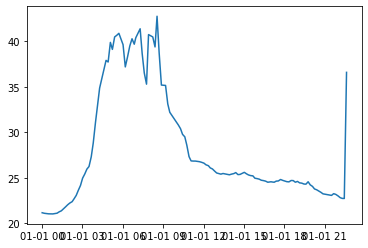

In [ ]:
x = []
y = []
ts = []
for chunk in df_split:
  if chunk.empty:
    continue
  x = chunk['time_new']
  ts = chunk['value']
  
    # Create a new figure
  plt.figure()
    
    # Plot the data
  plt.plot(x, ts)
    
    # Show the plot
  plt.show()

  break

y = np.array(ts.tolist())

In [ ]:
n_breaks = 3
model = rpt.Dynp(model="l1")
model.fit(y)
breaks = model.predict(n_bkps=n_breaks-1)

In [ ]:
breaks_rpt = []
for i in breaks:
    breaks_rpt.append(ts.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)
breaks_rpt

DatetimeIndex(['2022-01-01 03:29:06.930000+00:00',
               '2022-01-01 09:10:33.965000+00:00',
               '2022-01-01 22:37:45.763000+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

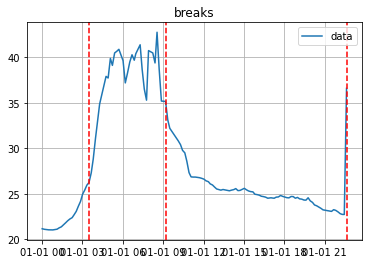

In [ ]:
plt.plot(ts, label='data')
plt.title('breaks')
print_legend = True
for i in breaks_rpt:
  plt.axvline(i, color='red',linestyle='dashed')
       
plt.grid()
plt.legend()
plt.show()